In [1]:
import pyspark.sql
import pandas as pd

### Total number of records (per wiki)

In [2]:
query = """SELECT wiki AS Wiki, COUNT(*) as `Number of Records`
        FROM gmodena.imagerec_prod
        GROUP BY wiki
        ORDER BY wiki"""
total_number_of_records = spark.sql(query).toPandas()

In [3]:
total_number_of_records

,Wiki,Number of Records
0,arwiki,105743
1,arzwiki,50417
2,bnwiki,15589
3,cebwiki,138102
4,cswiki,73195
5,dewiki,25777
6,enwiki,248043
7,euwiki,40041
8,fawiki,114188
9,frwiki,153538


### Population statistics

In [4]:
total_number_of_records['Number of Records'].describe()

count        19.000000
mean      90284.052632
std       64328.164644
min       15589.000000
25%       35001.500000
50%       73195.000000
75%      126145.000000
max      248043.000000
Name: Number of Records, dtype: float64

In [5]:
total_number_of_records['Number of Records'].median()

73195.0

In [6]:
total_number_of_records['Number of Records'].mode()

0      15589
1      25777
2      27709
3      29694
4      29962
5      40041
6      50417
7      51910
8      57538
9      73195
10    102178
11    102620
12    105743
13    114188
14    138102
15    153538
16    168277
17    180876
18    248043
dtype: int64

### Total number of images per page

In [7]:
query = """SELECT wiki AS Wiki, page_id as `Page ID`, COUNT(*) as `Number of Images`
        FROM gmodena.imagerec_prod
        GROUP BY wiki, page_id
        ORDER BY wiki, page_id"""
total_number_of_images_per_page = spark.sql(query).toPandas()

In [8]:
total_number_of_images_per_page

,Wiki,Page ID,Number of Images
0,arwiki,1000005,3
1,arwiki,1000145,1
2,arwiki,1000376,3
3,arwiki,1000409,1
4,arwiki,1000432,3
5,arwiki,1000466,1
6,arwiki,1000485,1
7,arwiki,1000792,3
8,arwiki,1000875,1
9,arwiki,1001000,1


#### Breakdown of the number of images being suggested for each page

Keep in mind that pages without an image suggestion will apear as 1.

In [9]:
query = """SELECT number_of_images AS `Image Suggestions`, count(*) AS `Pages`
        FROM (
        SELECT wiki, page_id, COUNT(*) as number_of_images
        FROM gmodena.imagerec_prod
        GROUP BY wiki, page_id
        ) AS expr_qry 
        GROUP BY number_of_images
        ORDER BY number_of_images"""
breakdown_of_image_sug_per_page = spark.sql(query).toPandas()

In [10]:
breakdown_of_image_sug_per_page.set_index('Image Suggestions', inplace=True)
breakdown_of_image_sug_per_page

,Pages
Image Suggestions,
1,400602
2,172419
3,323310
4,1
5,1
6,3


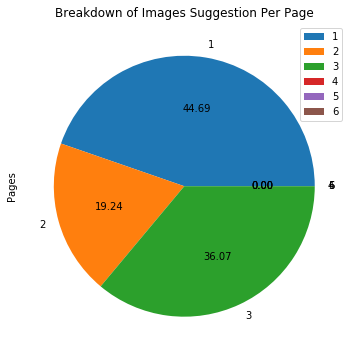

In [12]:
breakdown_of_image_sug_per_page.plot.pie(y='Pages',
                                         title='Breakdown of Images Suggestion Per Page',
                                         autopct="%.2f",
                                         figsize=(6, 6));

Breakdown of image suggestion data by confidence rating.
A rating of None indicates that the page had no image suggestion

In [13]:
query = """SELECT wiki AS Wiki, confidence_rating AS `Confidence Rating`, COUNT(*) AS `Image Suggestions`
        FROM gmodena.imagerec_prod
        GROUP BY wiki, confidence_rating
        ORDER BY `Wiki`, `Confidence Rating`"""
breakdown_of_image_sug_by_confidence_score = spark.sql(query).toPandas()

In [14]:
breakdown_of_image_sug_by_confidence_score

,Wiki,Confidence Rating,Image Suggestions
0,arwiki,high,6430
1,arwiki,low,19328
2,arwiki,medium,79985
3,arzwiki,high,617
4,arzwiki,low,14263
5,arzwiki,medium,35537
6,bnwiki,high,2185
7,bnwiki,low,1775
8,bnwiki,medium,11629
9,cebwiki,high,32285


#### Get articles with more than 3 image suggestions

Assuming no error this table should be empty

In [15]:
query = """WITH large_image_sug AS 
        (SELECT wiki, page_id, COUNT(*)
        FROM gmodena.imagerec_prod
        GROUP BY wiki, page_id
        HAVING COUNT(*) > 3)
        SELECT p.* 
        FROM gmodena.imagerec_prod p
        JOIN large_image_sug
        ON large_image_sug.wiki = p.wiki
        AND large_image_sug.page_id = p.page_id
        ORDER BY p.wiki, p.page_id, p.image_id"""
articles_with_more_image_sug = spark.sql(query).toPandas()

In [16]:
articles_with_more_image_sug

,page_id,page_title,image_id,confidence_rating,source,dataset_id,insertion_ts,wiki
0,63771264,Nucleocytoviricota,Comparison_of_the_size_of_giant_viruses_to_a_c...,medium,wikipedia,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,enwiki
1,63771264,Nucleocytoviricota,Comparison_of_the_size_of_giant_viruses_to_a_c...,medium,wikipedia,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,enwiki
2,63771264,Nucleocytoviricota,Electron_microscopic_image_of_a_mimivirus_-_jo...,medium,wikipedia,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,enwiki
3,63771264,Nucleocytoviricota,Electron_microscopic_image_of_a_mimivirus_-_jo...,medium,wikipedia,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,enwiki
4,63771264,Nucleocytoviricota,Megavirus.jpg,high,wikidata,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,enwiki
5,63771264,Nucleocytoviricota,Megavirus.jpg,medium,wikipedia,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,enwiki
6,225672,Metanogenesi,Anaerobic_food_chain.svg,low,commons,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,euwiki
7,225672,Metanogenesi,Cofactor_F430.png,low,commons,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,euwiki
8,225672,Metanogenesi,Cofactor_F430.png,low,commons,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,euwiki
9,225672,Metanogenesi,F420.png,low,commons,cda415d1-7bae-4fb0-8e2f-7179a5c4c931,1.614367e+09,euwiki
